# **Prueba técnica: Análisis bioestadístico**

Para empezar se crea un entorno virtual que se llama biostatistics que contiene todas las librerias
necesarias para el proyecto. Se procedera a analizar los datos de cada uno de los dataset individuales.

El primer objetivo trazado es llegar a una estructura de datos que contenga cada país con sus indicadores y un diccionario de dicha estructura.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Ahora se leeran y analizaran los datos de csv individuales para crear una estructura de datos

In [3]:


ruta = "C:/Users/USUARIO/Documents/GitHub/Biostatistics-analysis/datos"

df_age_death = pd.read_csv(f"{ruta}/30-70cancerChdEtc.csv")
df_airpollution_death_rate = pd.read_csv(f"{ruta}/airPollutionDeathRate.csv")
df_alcohol_substance_abuse = pd.read_csv(f"{ruta}/alcoholSubstanceAbuse.csv")
df_crude_suicide_rates = pd.read_csv(f"{ruta}/crudeSuicideRates.csv")
df_incidence_tuberculosis = pd.read_csv(f"{ruta}/incedenceOfTuberculosis.csv")
df_infant_mortality_rate = pd.read_csv(f"{ruta}/infantMortalityRate.csv")
df_maternal_mortality_ratio = pd.read_csv(f"{ruta}/maternalMortalityRatio.csv")
df_road_traffic_deaths = pd.read_csv(f"{ruta}/roadTrafficDeaths.csv")
df_tobacco_age = pd.read_csv(f"{ruta}/tobaccoAge15.csv")


Visualizando los datos correspondientes al primer df

In [4]:
df_age_death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2745 entries, 0 to 2744
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       2745 non-null   object 
 1   Period         2745 non-null   int64  
 2   Indicator      2745 non-null   object 
 3   Dim1           2745 non-null   object 
 4   First Tooltip  2745 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 107.4+ KB


In [5]:
df_age_death.head()

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2016,Probability (%) of dying between age 30 and ex...,Both sexes,29.8
1,Afghanistan,2016,Probability (%) of dying between age 30 and ex...,Male,31.8
2,Afghanistan,2016,Probability (%) of dying between age 30 and ex...,Female,27.7
3,Afghanistan,2015,Probability (%) of dying between age 30 and ex...,Both sexes,29.8
4,Afghanistan,2015,Probability (%) of dying between age 30 and ex...,Male,31.9


Se visualiza que los datos se encuentran en formato adecuado

In [6]:
df_age_death.Indicator.unique()

array(['Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease'],
      dtype=object)

Se crea la columna para concatenar los dataframes

In [7]:
df_age_death['Probability of dying 30-70'] = df_age_death['First Tooltip'].copy()

In [8]:
df_age_death.Location.nunique()

184

Verificando que los datos tengan congruencia

In [9]:
df_age_death[df_age_death['First Tooltip']>100].sum()

Location                        0
Period                          0
Indicator                       0
Dim1                            0
First Tooltip                 0.0
Probability of dying 30-70    0.0
dtype: object

Se debe dejar el dataframe solo con las columnas de interés.

### **Se crea una función para filtrar las columnas**

In [10]:
def filter_dataframes(df,columns):
    df_copy = df.copy()
    df_filtered = df_copy[[columns]]
    return df_filtered

#### **Se crea una función para borrar columnas**

In [11]:
def drop_columns(df, columns_d):
    df_copy = df.copy()
    df_copy.drop(columns=columns_d, inplace=True)
    return df_copy


In [12]:
columns_drop = ['Indicator', 'First Tooltip']
df_age_copy = drop_columns(df_age_death, columns_drop)

Ahora se procedera de la misma forma con el resto de dataframes

#### **Para el segundo dataframe**

In [13]:
df_airpollution_death_rate.head()

,Location,Dim2,Indicator,Period,Dim1,First Tooltip
0,Afghanistan,Total,Ambient and household air pollution attributab...,2016,Both sexes,95.12 [85.12-104.3]
1,Afghanistan,Total,Ambient and household air pollution attributab...,2016,Male,95.58 [85.5-106]
2,Afghanistan,Total,Ambient and household air pollution attributab...,2016,Female,94.63 [84.55-103.9]
3,Afghanistan,Total,Ambient and household air pollution attributab...,2016,Both sexes,211.1 [188.9-231.3]
4,Afghanistan,Total,Ambient and household air pollution attributab...,2016,Male,228.7 [204.6-253.6]


Se crea una función de preprocesamiento para separar la mediana del intervalo de confianza y el intervalo en dos columnas.

In [14]:

def split_interval_median(df, column, name_column, median):
    pattern = r'\[(.*?)\]' 
    df[name_column] = df[column].str.extract(pattern, expand=False)
    df[median] = df[column].str.extract(r'(\d+\.\d+|\d+)', expand=False).astype(float)
    return df

In [15]:
df_airpollution_death_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6588 entries, 0 to 6587
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Location       6588 non-null   object
 1   Dim2           6588 non-null   object
 2   Indicator      6588 non-null   object
 3   Period         6588 non-null   int64 
 4   Dim1           6588 non-null   object
 5   First Tooltip  6588 non-null   object
dtypes: int64(1), object(5)
memory usage: 308.9+ KB


Se observan los indicadores presentes en el dataframe

In [16]:
df_airpollution_death_rate.Indicator.unique()

array(['Ambient and household air pollution attributable death rate (per 100 000 population)',
       'Ambient and household air pollution attributable death rate (per 100 000 population, age-standardized)'],
      dtype=object)

In [17]:
df_airpollution_death_rate.Dim2.unique()

array(['Total', 'Lower respiratory infections',
       'Trachea, bronchus, lung cancers', 'Ischaemic heart disease',
       'Stroke', 'Chronic obstructive pulmonary disease'], dtype=object)

In [18]:
df_airpollution_death_rate.Location.nunique()

183

In [19]:
df_indicator_air = df_airpollution_death_rate[df_airpollution_death_rate['Indicator'] ==
 'Ambient and household air pollution attributable death rate (per 100 000 population)']

In [20]:
df_indicator_air_normalized = df_airpollution_death_rate[df_airpollution_death_rate['Indicator'] ==
 'Ambient and household air pollution attributable death rate (per 100 000 population, age-standardized)']

In [21]:
split_interval_median(df_indicator_air, "First Tooltip", "Pollution death rate per 100 000", "Point estimate pollution death rate per 100 000")

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_9892\3424376160.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[name_column] = df[column].str.extract(pattern, expand=False)
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_9892\3424376160.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[median] = df[column].str.extract(r'(\d+\.\d+|\d+)', expand=False).astype(float)


,Location,Dim2,Indicator,Period,Dim1,First Tooltip,Pollution death rate per 100 000,Point estimate pollution death rate per 100 000
0,Afghanistan,Total,Ambient and household air pollution attributab...,2016,Both sexes,95.12 [85.12-104.3],85.12-104.3,95.12
1,Afghanistan,Total,Ambient and household air pollution attributab...,2016,Male,95.58 [85.5-106],85.5-106,95.58
2,Afghanistan,Total,Ambient and household air pollution attributab...,2016,Female,94.63 [84.55-103.9],84.55-103.9,94.63
6,Afghanistan,Lower respiratory infections,Ambient and household air pollution attributab...,2016,Both sexes,31.26 [25.66-35.67],25.66-35.67,31.26
7,Afghanistan,Lower respiratory infections,Ambient and household air pollution attributab...,2016,Male,29.37 [24.07-33.6],24.07-33.6,29.37
...,...,...,...,...,...,...,...,...
6577,Zimbabwe,Stroke,Ambient and household air pollution attributab...,2016,Male,6.17 [5.26-7.21],5.26-7.21,6.17
6578,Zimbabwe,Stroke,Ambient and household air pollution attributab...,2016,Female,10.27 [8.7-12],8.7-12,10.27
6582,Zimbabwe,Chronic obstructive pulmonary disease,Ambient and household air pollution attributab...,2016,Both sexes,5.88 [4.26-7.26],4.26-7.26,5.88
6583,Zimbabwe,Chronic obstructive pulmonary disease,Ambient and household air pollution attributab...,2016,Male,5.54 [2.74-7.66],2.74-7.66,5.54


In [22]:
df_air_copy = drop_columns(df_indicator_air, columns_drop)

In [23]:
split_interval_median(df_indicator_air_normalized, "First Tooltip", "Pollution death rate per 100 000 standarized", "Point estimate pollution death rate per 100 000 standarized")

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_9892\3424376160.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[name_column] = df[column].str.extract(pattern, expand=False)
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_9892\3424376160.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[median] = df[column].str.extract(r'(\d+\.\d+|\d+)', expand=False).astype(float)


,Location,Dim2,Indicator,Period,Dim1,First Tooltip,Pollution death rate per 100 000 standarized,Point estimate pollution death rate per 100 000 standarized
3,Afghanistan,Total,Ambient and household air pollution attributab...,2016,Both sexes,211.1 [188.9-231.3],188.9-231.3,211.10
4,Afghanistan,Total,Ambient and household air pollution attributab...,2016,Male,228.7 [204.6-253.6],204.6-253.6,228.70
5,Afghanistan,Total,Ambient and household air pollution attributab...,2016,Female,194.7 [173.9-213.7],173.9-213.7,194.70
9,Afghanistan,Lower respiratory infections,Ambient and household air pollution attributab...,2016,Both sexes,31.68 [26.01-36.15],26.01-36.15,31.68
10,Afghanistan,Lower respiratory infections,Ambient and household air pollution attributab...,2016,Male,33.19 [27.21-37.97],27.21-37.97,33.19
...,...,...,...,...,...,...,...,...
6580,Zimbabwe,Stroke,Ambient and household air pollution attributab...,2016,Male,16.48 [14.04-19.26],14.04-19.26,16.48
6581,Zimbabwe,Stroke,Ambient and household air pollution attributab...,2016,Female,22.68 [19.22-26.5],19.22-26.5,22.68
6585,Zimbabwe,Chronic obstructive pulmonary disease,Ambient and household air pollution attributab...,2016,Both sexes,16.09 [11.67-19.89],11.67-19.89,16.09
6586,Zimbabwe,Chronic obstructive pulmonary disease,Ambient and household air pollution attributab...,2016,Male,17.72 [8.75-24.51],8.75-24.51,17.72


In [24]:
df_air_copy_normalized = drop_columns(df_indicator_air_normalized, columns_drop)

#### **Para el tercer dataframe**

Ahora a explorar el tercer dataframe

In [25]:
df_alcohol_substance_abuse.head()

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2018,Total (recorded+unrecorded) alcohol per capita...,Both sexes,0.210
1,Afghanistan,2018,Total (recorded+unrecorded) alcohol per capita...,Male,0.360
2,Afghanistan,2018,Total (recorded+unrecorded) alcohol per capita...,Female,0.055
3,Afghanistan,2015,Total (recorded+unrecorded) alcohol per capita...,Both sexes,0.210
4,Afghanistan,2015,Total (recorded+unrecorded) alcohol per capita...,Male,0.350


In [26]:
df_alcohol_substance_abuse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2787 entries, 0 to 2786
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       2787 non-null   object 
 1   Period         2787 non-null   int64  
 2   Indicator      2787 non-null   object 
 3   Dim1           2787 non-null   object 
 4   First Tooltip  2787 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 109.0+ KB


In [27]:
df_alcohol_substance_abuse.Indicator.unique()

array(['Total (recorded+unrecorded) alcohol per capita (15+) consumption'],
      dtype=object)

In [28]:
df_alcohol_substance_abuse['Alcohol per capita (15+) consumption'] =df_alcohol_substance_abuse['First Tooltip']

In [29]:
df_alcohol_substance_abuse.Location.nunique()

188

In [30]:

df_alcohol_copy = drop_columns(df_alcohol_substance_abuse, columns_drop)

Vemos que existe una diferencia entre los paises que se encuentran en cada dataframe por lo que debe ser tenida en cuenta 
a la hora de unir los dataframes

#### **Explorando el dataframe 4 se tiene**

In [31]:
df_crude_suicide_rates.head()

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2016,Crude suicide rates (per 100 000 population),Both sexes,0.0
1,Afghanistan,2016,Crude suicide rates (per 100 000 population),Male,0.0
2,Afghanistan,2016,Crude suicide rates (per 100 000 population),Female,0.0
3,Afghanistan,2015,Crude suicide rates (per 100 000 population),Both sexes,4.8
4,Afghanistan,2015,Crude suicide rates (per 100 000 population),Male,7.8


In [32]:
df_crude_suicide_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2745 entries, 0 to 2744
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       2745 non-null   object 
 1   Period         2745 non-null   int64  
 2   Indicator      2745 non-null   object 
 3   Dim1           2745 non-null   object 
 4   First Tooltip  2745 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 107.4+ KB


In [33]:
df_crude_suicide_rates.Indicator.unique()


array(['Crude suicide rates (per 100 000 population)'], dtype=object)

Acá se crea la columna para concatenar los dataframes

In [34]:
df_crude_suicide_rates['Crude suicide rates per 100 000'] = df_crude_suicide_rates['First Tooltip'].copy()

In [35]:
df_crude_suicide_rates.Location.nunique()

184

In [36]:

df_suicide_copy = drop_columns(df_crude_suicide_rates, columns_drop)

#### **Ahora el dataframe 5**

In [37]:
df_incidence_tuberculosis.head()

,Location,Indicator,Period,First Tooltip
0,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2019,189 [122-270]
1,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2018,189 [122-270]
2,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2017,189 [122-270]
3,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2016,189 [122-270]
4,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2015,189 [122-270]


In [38]:
split_interval_median(df_incidence_tuberculosis, "First Tooltip", "Incidence of tuberculosis per 100 000", "Point estimate incidence of tuberculosis")

,Location,Indicator,Period,First Tooltip,Incidence of tuberculosis per 100 000,Point estimate incidence of tuberculosis
0,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2019,189 [122-270],122-270,189.0
1,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2018,189 [122-270],122-270,189.0
2,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2017,189 [122-270],122-270,189.0
3,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2016,189 [122-270],122-270,189.0
4,Afghanistan,Incidence of tuberculosis (per 100 000 populat...,2015,189 [122-270],122-270,189.0
...,...,...,...,...,...,...
3852,Zimbabwe,Incidence of tuberculosis (per 100 000 populat...,2004,607 [451-786],451-786,607.0
3853,Zimbabwe,Incidence of tuberculosis (per 100 000 populat...,2003,617 [462-794],462-794,617.0
3854,Zimbabwe,Incidence of tuberculosis (per 100 000 populat...,2002,617 [478-773],478-773,617.0
3855,Zimbabwe,Incidence of tuberculosis (per 100 000 populat...,2001,617 [461-795],461-795,617.0


In [39]:
df_incidence_tuberculosis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3857 entries, 0 to 3856
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Location                                  3857 non-null   object 
 1   Indicator                                 3857 non-null   object 
 2   Period                                    3857 non-null   int64  
 3   First Tooltip                             3857 non-null   object 
 4   Incidence of tuberculosis per 100 000     3857 non-null   object 
 5   Point estimate incidence of tuberculosis  3857 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 180.9+ KB


In [40]:
df_incidence_tuberculosis.Indicator.unique()

array(['Incidence of tuberculosis (per 100 000 population per year)'],
      dtype=object)

Ahora se crea la columna para concatenar los dataframes

In [41]:
df_incidence_tuberculosis.Location.nunique()

195

In [42]:

df_tuberculosis_copy = drop_columns(df_incidence_tuberculosis, columns_drop)

#### **Ahora el dataframe 6**

In [43]:
df_infant_mortality_rate.head()

,Location,Period,Indicator,Dim1,First Tooltip
0,Afghanistan,2019,Infant mortality rate (probability of dying be...,Both sexes,46.51 [37.71-55.82]
1,Afghanistan,2019,Infant mortality rate (probability of dying be...,Male,49.8 [40.2-59.95]
2,Afghanistan,2019,Infant mortality rate (probability of dying be...,Female,43.05 [34.82-51.96]
3,Afghanistan,2018,Infant mortality rate (probability of dying be...,Both sexes,48.04 [39.94-56.32]
4,Afghanistan,2018,Infant mortality rate (probability of dying be...,Male,51.35 [42.56-60.4]


In [44]:
df_infant_mortality_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Location       29999 non-null  object
 1   Period         29999 non-null  int64 
 2   Indicator      29999 non-null  object
 3   Dim1           29999 non-null  object
 4   First Tooltip  29999 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.1+ MB


In [45]:
df_infant_mortality_rate.duplicated().sum()

0

In [46]:
df_infant_mortality_rate.Indicator.unique()

array(['Infant mortality rate (probability of dying between birth and age 1 per 1000 live births)'],
      dtype=object)

In [47]:
split_interval_median(df_infant_mortality_rate, "First Tooltip", "Infant mortality rate", "Point estimate infant mortality rate")

,Location,Period,Indicator,Dim1,First Tooltip,Infant mortality rate,Point estimate infant mortality rate
0,Afghanistan,2019,Infant mortality rate (probability of dying be...,Both sexes,46.51 [37.71-55.82],37.71-55.82,46.51
1,Afghanistan,2019,Infant mortality rate (probability of dying be...,Male,49.8 [40.2-59.95],40.2-59.95,49.80
2,Afghanistan,2019,Infant mortality rate (probability of dying be...,Female,43.05 [34.82-51.96],34.82-51.96,43.05
3,Afghanistan,2018,Infant mortality rate (probability of dying be...,Both sexes,48.04 [39.94-56.32],39.94-56.32,48.04
4,Afghanistan,2018,Infant mortality rate (probability of dying be...,Male,51.35 [42.56-60.4],42.56-60.4,51.35
...,...,...,...,...,...,...,...
29994,Timor-Leste,2002,Infant mortality rate (probability of dying be...,Both sexes,77.08 [70.29-84.49],70.29-84.49,77.08
29995,Timor-Leste,2002,Infant mortality rate (probability of dying be...,Male,82.53 [74.86-90.67],74.86-90.67,82.53
29996,Timor-Leste,2002,Infant mortality rate (probability of dying be...,Female,71.37 [64.81-78.76],64.81-78.76,71.37
29997,Timor-Leste,2001,Infant mortality rate (probability of dying be...,Both sexes,80.96 [74.1-88.4],74.1-88.4,80.96


In [48]:
df_infant_mortality_rate.Location.nunique()

177

In [49]:

df_infant_copy = drop_columns(df_infant_mortality_rate, columns_drop)

#### **Ahora el septimo dataframe**

In [50]:
df_maternal_mortality_ratio.head()

,Location,Period,Indicator,First Tooltip
0,Afghanistan,2017,Maternal mortality ratio (per 100 000 live bir...,638 [427-1010]
1,Afghanistan,2016,Maternal mortality ratio (per 100 000 live bir...,673 [457-1040]
2,Afghanistan,2015,Maternal mortality ratio (per 100 000 live bir...,701 [501-1020]
3,Afghanistan,2014,Maternal mortality ratio (per 100 000 live bir...,786 [592-1080]
4,Afghanistan,2013,Maternal mortality ratio (per 100 000 live bir...,810 [617-1080]


In [51]:
df_maternal_mortality_ratio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Location       3294 non-null   object
 1   Period         3294 non-null   int64 
 2   Indicator      3294 non-null   object
 3   First Tooltip  3294 non-null   object
dtypes: int64(1), object(3)
memory usage: 103.1+ KB


In [52]:
df_maternal_mortality_ratio.duplicated().sum()

0

In [53]:
df_maternal_mortality_ratio.Indicator.unique()

array(['Maternal mortality ratio (per 100 000 live births)'], dtype=object)

In [54]:
df_maternal_mortality_ratio.Location.nunique()

184

In [55]:
split_interval_median(df_maternal_mortality_ratio, "First Tooltip", "Maternal mortality ratio per 100 000", "Point estimate maternal mortality ratio per 100 000")

,Location,Period,Indicator,First Tooltip,Maternal mortality ratio per 100 000,Point estimate maternal mortality ratio per 100 000
0,Afghanistan,2017,Maternal mortality ratio (per 100 000 live bir...,638 [427-1010],427-1010,638.0
1,Afghanistan,2016,Maternal mortality ratio (per 100 000 live bir...,673 [457-1040],457-1040,673.0
2,Afghanistan,2015,Maternal mortality ratio (per 100 000 live bir...,701 [501-1020],501-1020,701.0
3,Afghanistan,2014,Maternal mortality ratio (per 100 000 live bir...,786 [592-1080],592-1080,786.0
4,Afghanistan,2013,Maternal mortality ratio (per 100 000 live bir...,810 [617-1080],617-1080,810.0
...,...,...,...,...,...,...
3289,Zimbabwe,2004,Maternal mortality ratio (per 100 000 live bir...,686 [597-784],597-784,686.0
3290,Zimbabwe,2003,Maternal mortality ratio (per 100 000 live bir...,680 [590-779],590-779,680.0
3291,Zimbabwe,2002,Maternal mortality ratio (per 100 000 live bir...,666 [577-766],577-766,666.0
3292,Zimbabwe,2001,Maternal mortality ratio (per 100 000 live bir...,629 [544-723],544-723,629.0


In [56]:
df_maternal_copy = drop_columns(df_maternal_mortality_ratio, columns_drop)

#### **Para el octavo dataframe**

In [57]:
df_road_traffic_deaths.head()

,Location,Indicator,Period,First Tooltip
0,Afghanistan,Estimated road traffic death rate (per 100 000...,2016,15.1
1,Albania,Estimated road traffic death rate (per 100 000...,2016,13.6
2,Angola,Estimated road traffic death rate (per 100 000...,2016,23.6
3,Antigua and Barbuda,Estimated road traffic death rate (per 100 000...,2016,7.9
4,Argentina,Estimated road traffic death rate (per 100 000...,2016,14.0


In [58]:
df_road_traffic_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       175 non-null    object 
 1   Indicator      175 non-null    object 
 2   Period         175 non-null    int64  
 3   First Tooltip  175 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.6+ KB


In [59]:
df_road_traffic_deaths.Indicator.unique()

array(['Estimated road traffic death rate (per 100 000 population)'],
      dtype=object)

In [60]:
df_road_traffic_deaths['Road traffic death rate (per 100 000'] = df_road_traffic_deaths['First Tooltip'].copy()

In [61]:
df_traffic_copy = drop_columns(df_road_traffic_deaths, columns_drop)

#### **Ahora el ultimo dataframe**

In [62]:
df_tobacco_age.head()

,Location,Indicator,Period,Dim1,First Tooltip
0,Albania,Age-standardized prevalence of current tobacco...,2018,Both sexes,29.2
1,Albania,Age-standardized prevalence of current tobacco...,2018,Male,50.5
2,Albania,Age-standardized prevalence of current tobacco...,2018,Female,7.9
3,Albania,Age-standardized prevalence of current tobacco...,2017,Both sexes,29.3
4,Albania,Age-standardized prevalence of current tobacco...,2017,Male,50.6


In [63]:
df_tobacco_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4023 entries, 0 to 4022
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       4023 non-null   object 
 1   Indicator      4023 non-null   object 
 2   Period         4023 non-null   int64  
 3   Dim1           4023 non-null   object 
 4   First Tooltip  4023 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 157.3+ KB


In [64]:
df_tobacco_age.duplicated().sum()

0

In [65]:
df_tobacco_age.Indicator.unique()

array(['Age-standardized prevalence of current tobacco smoking among persons aged 15 years and older'],
      dtype=object)

In [66]:
df_tobacco_age.Location.nunique()

149

In [67]:
df_tobacco_age['Prevalence of current tobacco smoking (15+)'] = df_tobacco_age['First Tooltip'].copy()

In [68]:

df_tobacco_copy = drop_columns(df_tobacco_age, columns_drop)

Se añade la columna para hacer el cruce.

La estrategia sera unir los dataframes a traves de la columna pais, año y los indicadores seran las columnas del nuevo 
dataframe, primero se realizara este procedimiento con los dataframes que no tengan indicadores categorizados por sexo.

Estos son: df_maternal_copy, df_tuberculosis_copy, df_traffic_copy

##### **Se crea una función para hacer el cruce**

In [69]:
def concatenate_dfs_in_sequence(df_list, merge_columns, merge_how="outer"):

    concatenated_result = pd.merge(df_list[0], df_list[1], on=merge_columns, how=merge_how)

    for df in df_list[2:]:
        concatenated_result = pd.merge(concatenated_result, df, on=merge_columns, how=merge_how)

    return concatenated_result


In [70]:
list_dataframes_nodim = [df_maternal_copy, df_tuberculosis_copy, df_traffic_copy]
merge_columns_first = ["Location", "Period"]
df_final = concatenate_dfs_in_sequence(list_dataframes_nodim, merge_columns_first, merge_how="outer")


Solo se dejaran los indicadores, en caso de que solo se encuentre un indicador el otro será null

Ahora para trabajar con el resto de dataframes que si tienen la variable sexo se añadirá una columna que contenga el sexo y que será 
la clave para combinar el resto de dataframes.

In [71]:
df_final.loc[:, 'Dim1'] = 'Both sexes'

Se concatenarán todos aquellos dataframes que tengan la columna localización, dim1, pais excluyendo el que tiene dim2 que se le dará otro manejo.


La lista es la siguiente, los que se marcan con (-) serán los incluidos:



df_airpollution_death_rate --

df_age_copy --

df_alcohol_copy **

df_suicide_copy --

df_tuberculosis_copy **

df_infant_copy --

df_maternal_copy **

df_tobacco_copy --

df_traffic_copy --

df_air_copy_normalized --

df_air_copy --


In [72]:
list_dataframes_air = [df_air_copy_normalized
,df_air_copy]
merge_columns_air = ["Location", "Period", "Dim1", "Dim2"]
merge_how = "outer"
df_str_air = concatenate_dfs_in_sequence(list_dataframes_air, merge_columns_air, merge_how)


In [73]:
list_dataframes = [df_age_copy, df_suicide_copy, df_infant_copy,
 df_tobacco_copy, df_final, df_alcohol_copy, df_str_air]

In [74]:
merge_columns = ["Location", "Period", "Dim1"]
merge_how = "outer"
df_structured = concatenate_dfs_in_sequence(list_dataframes, merge_columns, merge_how)


 Cambiar el nombre de algunas columnas que no brindan información

In [75]:
nuevos_nombres = {
    'Dim1': 'Gender',
    'Dim2': 'Cause'
}
df_structured.rename(columns=nuevos_nombres, inplace=True)

# **Se construyó una estructura con todos los datos disponibles**

In [76]:
df_structured

,Location,Period,Gender,Probability of dying 30-70,Crude suicide rates per 100 000,Infant mortality rate,Point estimate infant mortality rate,Prevalence of current tobacco smoking (15+),Maternal mortality ratio per 100 000,Point estimate maternal mortality ratio per 100 000,Incidence of tuberculosis per 100 000,Point estimate incidence of tuberculosis,Road traffic death rate (per 100 000,Alcohol per capita (15+) consumption,Cause,Pollution death rate per 100 000 standarized,Point estimate pollution death rate per 100 000 standarized,Pollution death rate per 100 000,Point estimate pollution death rate per 100 000
0,Afghanistan,2016,Both sexes,29.8,0.0,44.36-58.38,51.32,NaN,457-1040,673.0,122-270,189.0,15.1,NaN,Total,188.9-231.3,211.10,85.12-104.3,95.12
1,Afghanistan,2016,Both sexes,29.8,0.0,44.36-58.38,51.32,NaN,457-1040,673.0,122-270,189.0,15.1,NaN,Lower respiratory infections,26.01-36.15,31.68,25.66-35.67,31.26
2,Afghanistan,2016,Both sexes,29.8,0.0,44.36-58.38,51.32,NaN,457-1040,673.0,122-270,189.0,15.1,NaN,"Trachea, bronchus, lung cancers",3.03-4.92,4.05,1.21-1.96,1.61
3,Afghanistan,2016,Both sexes,29.8,0.0,44.36-58.38,51.32,NaN,457-1040,673.0,122-270,189.0,15.1,NaN,Ischaemic heart disease,91.91-121.1,106.90,33.12-43.65,38.51
4,Afghanistan,2016,Both sexes,29.8,0.0,44.36-58.38,51.32,NaN,457-1040,673.0,122-270,189.0,15.1,NaN,Stroke,38.59-51.65,45.10,13.48-18.04,15.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33555,Turkmenistan,2018,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.65,NaN,NaN,NaN,NaN,NaN
33556,Venezuela (Bolivarian Republic of),2018,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.60,NaN,NaN,NaN,NaN,NaN
33557,Venezuela (Bolivarian Republic of),2018,Female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.75,NaN,NaN,NaN,NaN,NaN
33558,Viet Nam,2018,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.10,NaN,NaN,NaN,NaN,NaN


La estructura construida presenta los países con sus indicadores por año, las columnas de NaN representan los datos de indicadores
que no fueron reportados.

In [77]:
df_structured.to_excel('structured_data.xlsx')

### **Ahora se mostrará el diccionario de la estructura de datos creada**

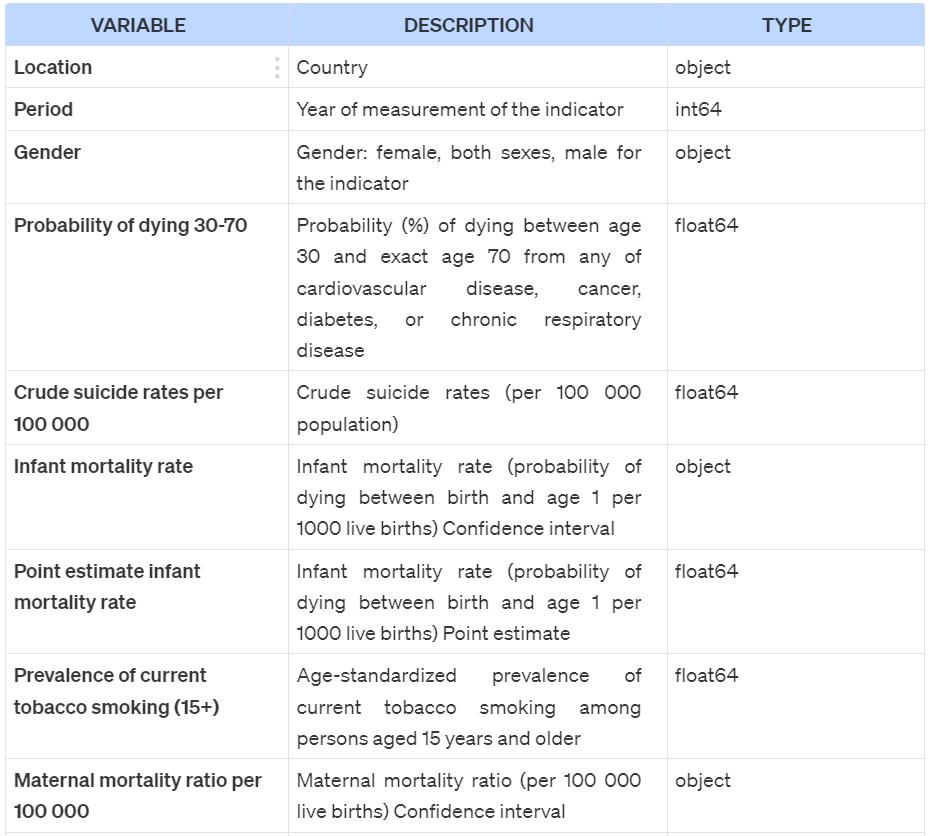

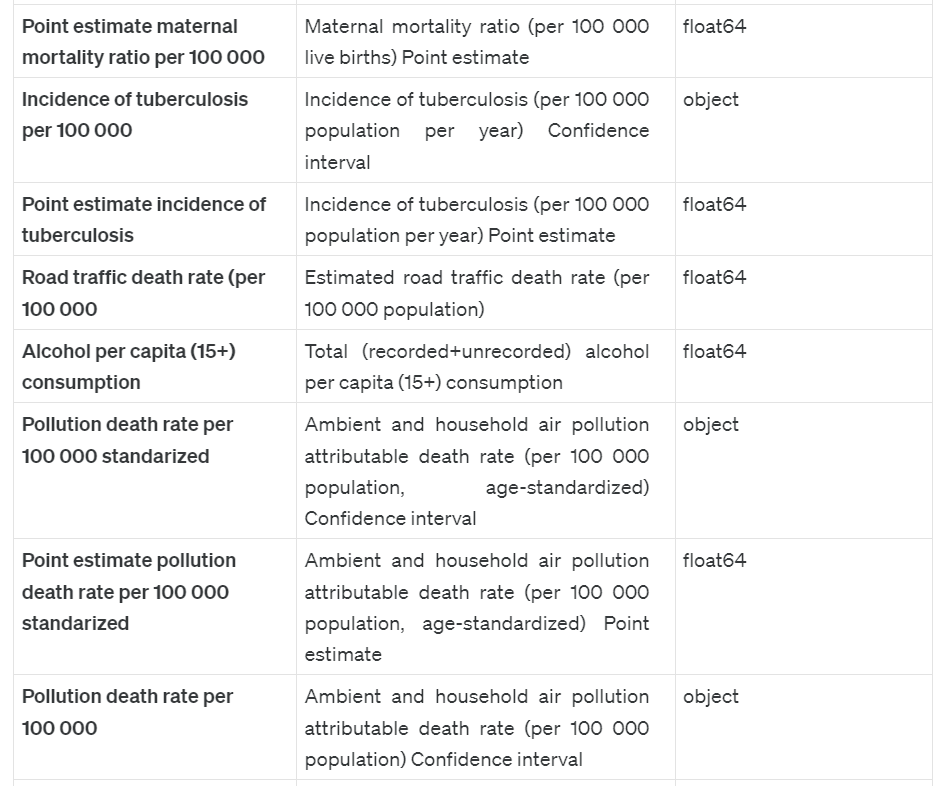

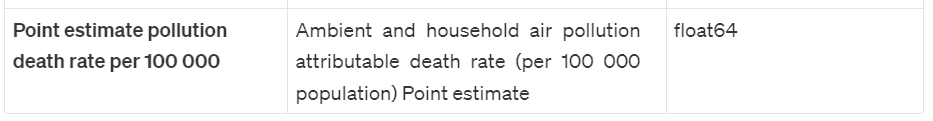

# **Segunda parte**

Como segundo objetivo se tiene realizar análisis descriptivo (univariado y multivariado)

#### **Análisis del primer indicador:**

Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease

Visualizando estadísticos descriptivos por país.

In [78]:
grouped_age_country = df_age_copy.groupby(["Location"])["Probability of dying 30-70"].describe()

Paises con mayor probabilidad de morir entre los 30 y 70 por las causas mencionadas

In [79]:
top_countries = grouped_age_country.sort_values(by='mean', ascending=False).head(10)
top_countries

,count,mean,std,min,25%,50%,75%,max
Location,,,,,,,,
Kazakhstan,15.0,33.733333,10.478663,18.5,27.10,32.9,39.05,51.7
Mongolia,15.0,33.520000,7.332433,21.9,28.95,33.3,38.95,44.5
Fiji,15.0,33.113333,6.016509,24.0,29.30,32.9,36.90,42.5
Sierra Leone,15.0,32.540000,2.980364,27.6,30.25,32.6,34.50,36.9
Turkmenistan,15.0,32.286667,6.197911,22.9,28.05,31.0,37.10,42.6
Afghanistan,15.0,31.953333,2.788206,27.7,29.80,31.8,34.10,36.6
Yemen,15.0,31.813333,2.383235,28.2,30.30,31.9,33.25,35.7
Russian Federation,15.0,31.700000,11.295258,16.1,24.45,30.4,37.15,51.4
Guyana,15.0,31.286667,1.399932,28.8,30.55,31.3,32.35,33.7


In [112]:
def plot_bar_chart(data_frame, y_col, title, x_rotation=45, colors=None, x_label='', y_label='',title_position=1.02):

    plt.figure(figsize=(10, 6))

    if colors is None:
        colors = sns.color_palette("Paired")[:len(data_frame)]

    ax = sns.barplot(data=data_frame, x=data_frame.index, y=y_col, palette=colors)

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title, y=title_position) 

    

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height + 0.5, f'{height:.1f}%', ha="center")

    plt.xticks(rotation=x_rotation)
    plt.tight_layout()

    plt.subplots_adjust(top=0.85)

    plt.show()


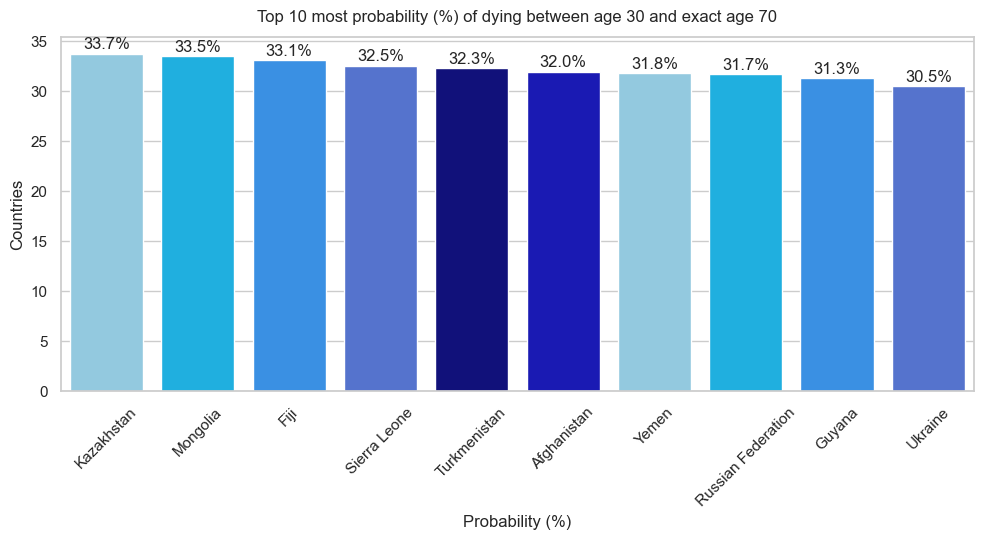

In [105]:
custom_colors = ['skyblue', 'deepskyblue', 'dodgerblue', 'royalblue', 'darkblue', 'mediumblue']
plot_bar_chart(top_countries, y_col='mean', title='Top 10 most probability (%) of dying between age 30 and exact age 70', colors=custom_colors, x_label='Probability (%)', y_label= 'Countries')

In [83]:
bottom_countries = grouped_age_country.sort_values(by='mean', ascending=False).tail(10)
bottom_countries

,count,mean,std,min,25%,50%,75%,max
Location,,,,,,,,
Republic of Korea,15.0,11.386667,5.128334,4.7,8.05,10.6,14.15,22.9
Israel,15.0,11.386667,2.959698,7.5,9.65,11.6,12.45,17.8
Spain,15.0,11.333333,4.025041,6.4,7.65,10.7,13.75,19.1
Norway,15.0,11.246667,2.772278,7.6,9.25,10.9,12.80,17.6
Italy,15.0,10.993333,3.100338,7.2,8.75,10.3,12.85,17.9
Sweden,15.0,10.773333,2.275166,7.6,9.20,10.6,11.95,15.8
Iceland,15.0,10.660000,2.252554,7.7,9.20,9.9,11.80,15.4
Australia,15.0,10.560000,2.522697,7.2,8.95,10.0,11.75,16.1
Switzerland,15.0,10.133333,2.798129,6.6,8.20,9.7,11.50,16.4


In [121]:
def plot_bar_chart_horizontal(data_frame, y_col, title, colors=None, y_rotation=0, x_label='', y_label='', title_position=1.02):

    plt.figure(figsize=(10, 6))

    if colors is None:
        colors = sns.color_palette("Paired")[:len(data_frame)]

    ax = sns.barplot(data=data_frame, y=data_frame.index, x=y_col, palette=colors)

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    plt.title(title, y=title_position)
    
    for p in ax.patches:
        width = p.get_width()  
        ax.annotate(f'{width:.1f}%', 
                    xy=(width, p.get_y() + p.get_height() / 2), 
                    xytext=(3, 0),  
                    textcoords="offset points",
                    ha='left', va='center',  
                    fontsize=8)  


    plt.yticks(rotation=y_rotation)
    plt.tight_layout()

    plt.show()

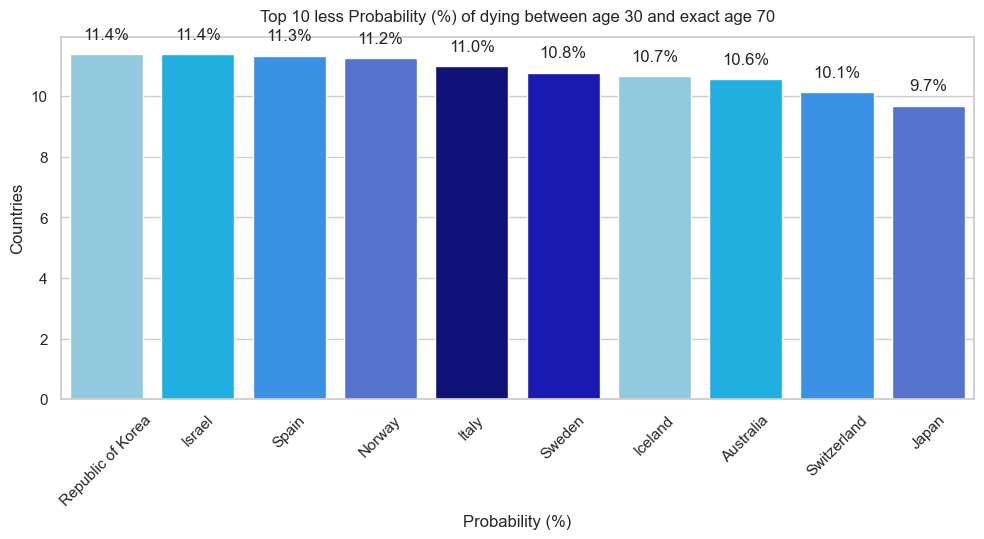

In [98]:
custom_colors = ['skyblue', 'deepskyblue', 'dodgerblue', 'royalblue', 'darkblue', 'mediumblue']
plot_bar_chart(bottom_countries, y_col='mean', title='Top 10 less Probability (%) of dying between age 30 and exact age 70', colors=custom_colors, x_label='Probability (%)', y_label= 'Countries')

In [86]:

top_5_countries = df_age_copy.groupby("Location")["Probability of dying 30-70"].mean().nlargest(5).index


filtered_data = df_age_copy[df_age_copy["Location"].isin(top_5_countries)]


grouped_genre = filtered_data.groupby(["Location", "Dim1"])["Probability of dying 30-70"].describe()


In [87]:
grouped_genre

count   mean       std   min   25%   50%   75%   max
Location     Dim1                                                            
Fiji         Both sexes    5.0  33.26  2.673574  30.6  30.8  32.9  35.6  36.4
             Female        5.0  26.56  2.680112  24.0  24.2  26.0  28.5  30.1
             Male          5.0  39.52  2.710535  36.8  37.0  39.2  42.1  42.5
Kazakhstan   Both sexes    5.0  33.28  5.714630  26.8  28.6  32.9  39.0  39.1
             Female        5.0  23.28  4.229303  18.5  19.8  23.0  27.4  27.7
             Male          5.0  44.64  6.944278  36.8  38.9  44.2  51.6  51.7
Mongolia     Both sexes    5.0  33.48  3.725185  30.2  30.4  32.3  35.6  38.9
             Female        5.0  25.92  4.734131  21.9  22.2  24.5  27.7  33.3
             Male          5.0  41.16  2.592875  38.8  39.0  40.2  43.3  44.5
Sierra Leone Both sexes    5.0  32.58  2.752635  30.0  30.5  31.8  33.9  36.7
             Female        5.0  34.02  1.785217  32.2  32.6  33.7  35.1  36.5
             Male          5.0  31.02  3.833667  27.6  28.2  29.7  32.7  36.9
Turkmenistan Both sexes    5.0  32.14  2.553037  29.5  30.6  31.0  34.0  35.6
             Female        5.0  25.56  2.438852  22.9  23.9  24.9  27.3  28.8
             Male          5.0  39.16  2.518531  36.7  37.5  38.0  41.0  42.6

In [131]:
def plot_genre_by_country(data_frame, x_label='', y_label='', title_t='', target=''):
    sns.set_palette("mako")
    
    grouped_genre = data_frame.groupby(["Location", "Dim1"])[target].mean()
    grouped_genre_df = grouped_genre.unstack()

    plt.figure(figsize=(12, 8))
    ax = grouped_genre_df.plot(kind="bar")

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title_t)
    plt.legend(title="Genre")

    plt.xticks(rotation=45, ha='right')

   
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.1f}%', 
                    xy=(p.get_x() + p.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=8)  

    plt.tight_layout()
    plt.show()




<Figure size 1200x800 with 0 Axes>

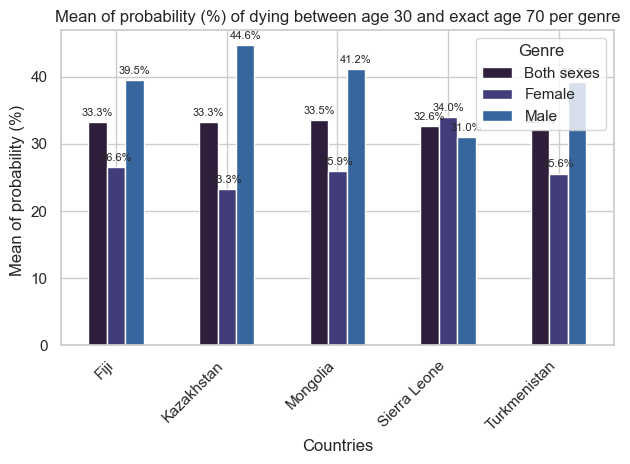

In [132]:

top_5_countries= df_age_copy.groupby("Location")["Probability of dying 30-70"].mean().nlargest(5).index
filtered_data = df_age_copy[df_age_copy["Location"].isin(top_5_countries)]
plot_genre_by_country(filtered_data, x_label='Countries', y_label='Mean of probability (%) ', title_t='Mean of probability (%) of dying between age 30 and exact age 70 per genre', target='Probability of dying 30-70')


<Figure size 1200x800 with 0 Axes>

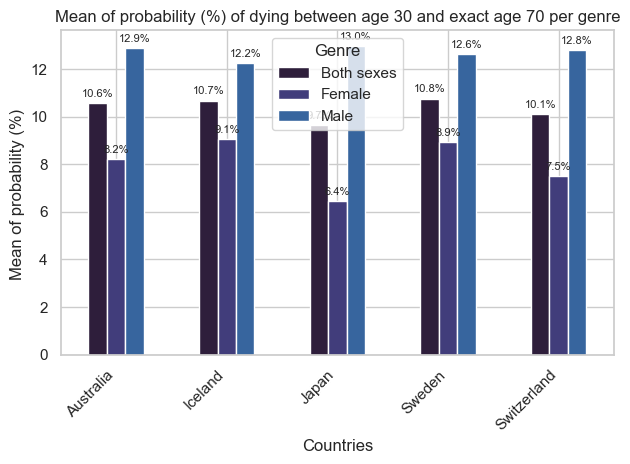

In [133]:

top_5_countries_less= df_age_copy.groupby("Location")["Probability of dying 30-70"].mean().nsmallest(5).index
filtered_data_less = df_age_copy[df_age_copy["Location"].isin(top_5_countries_less)]
plot_genre_by_country(filtered_data_less, x_label='Countries', y_label='Mean of probability (%) ', title_t='Mean of probability (%) of dying between age 30 and exact age 70 per genre', target='Probability of dying 30-70')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


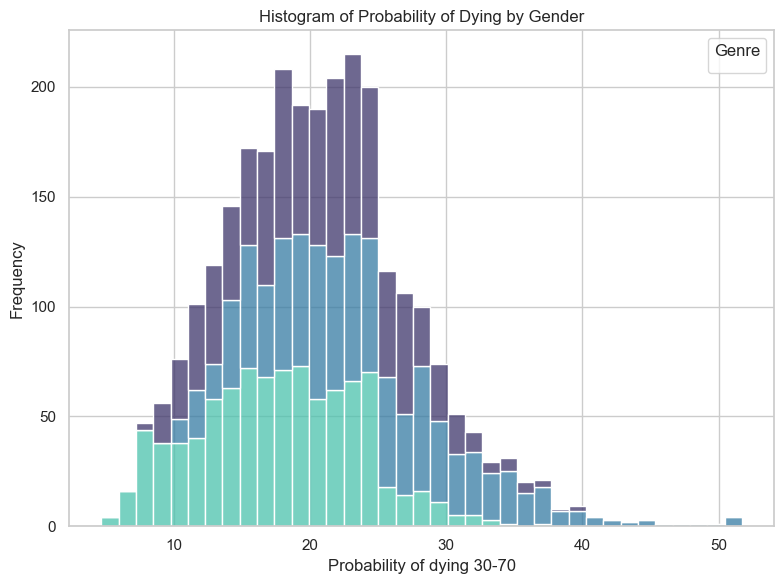

In [91]:

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  

sns.histplot(data=df_age_copy, x="Probability of dying 30-70", hue="Dim1", multiple="stack", palette="mako")

plt.xlabel("Probability of dying 30-70")
plt.ylabel("Frequency")
plt.title("Histogram of Probability of Dying by Gender")

plt.legend(title="Genre")
plt.tight_layout()

plt.show()

#### **Análisis para Total (recorded+unrecorded) alcohol per capita (15+) consumption**

Primero se hará una agrupación por país para determinar algunas hipótesis

In [93]:
grouped_alcohol_country = df_alcohol_copy.groupby(["Location"])['Alcohol per capita (15+) consumption'].describe()


In [94]:
top_countries_alcohol = grouped_alcohol_country.sort_values(by='mean', ascending=False).head(10)
top_countries_alcohol

,count,mean,std,min,25%,50%,75%,max
Location,,,,,,,,
Lithuania,15.0,15.172000,7.062224,6.38,7.835,15.25,21.480,25.84
Russian Federation,15.0,15.052667,8.069950,4.58,7.465,15.73,20.200,28.52
Republic of Moldova,15.0,14.824667,7.441915,5.27,8.955,13.89,19.435,30.74
Belarus,15.0,14.730000,7.263077,5.38,8.115,15.17,19.105,27.68
Czechia,15.0,14.654000,6.483875,6.86,7.305,14.45,21.800,23.23
Romania,15.0,14.320667,6.979104,5.45,8.005,13.97,18.470,27.13
Uganda,15.0,14.174667,7.332034,5.33,5.900,13.61,21.350,24.70
Luxembourg,15.0,13.455333,5.795789,6.36,7.000,13.18,19.610,21.75
Ireland,15.0,13.410000,5.853423,5.95,7.450,12.88,18.685,22.73


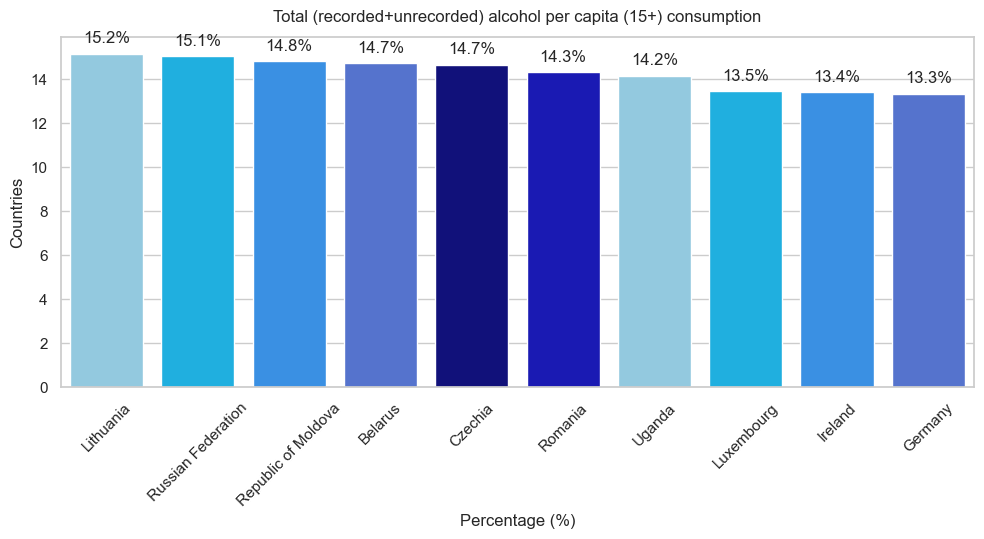

In [108]:

custom_colors = ['skyblue', 'deepskyblue', 'dodgerblue', 'royalblue', 'darkblue', 'mediumblue']
plot_bar_chart(top_countries_alcohol, y_col='mean', title='Total (recorded+unrecorded) alcohol per capita (15+) consumption', colors=custom_colors, x_label='Percentage (%)', y_label= 'Countries')



In [109]:
bottom_countries_alcohol = grouped_alcohol_country.sort_values(by='mean', ascending=False).tail(10)
bottom_countries_alcohol

,count,mean,std,min,25%,50%,75%,max
Location,,,,,,,,
Egypt,15.0,0.331667,0.213921,0.0690,0.1050,0.360,0.4600,0.690
Yemen,15.0,0.282267,0.373586,0.0130,0.0530,0.094,0.3200,1.360
Pakistan,15.0,0.210267,0.162594,0.0260,0.0865,0.160,0.3000,0.570
Afghanistan,9.0,0.207000,0.130966,0.0540,0.0550,0.210,0.3500,0.360
Saudi Arabia,15.0,0.168200,0.103411,0.0370,0.0435,0.180,0.2600,0.310
Bangladesh,15.0,0.117200,0.123119,0.0050,0.0270,0.044,0.1950,0.390
Mauritania,15.0,0.097600,0.097698,0.0090,0.0340,0.058,0.1400,0.350
Somalia,15.0,0.074467,0.136591,0.0000,0.0030,0.016,0.0710,0.490
Libya,15.0,0.058067,0.051316,0.0050,0.0200,0.034,0.0905,0.170


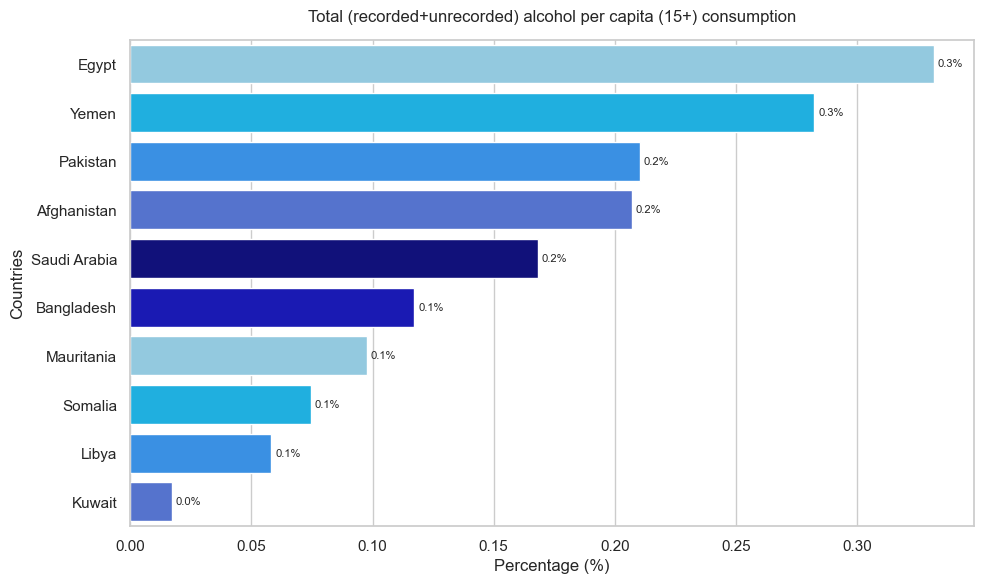

In [123]:

custom_colors = ['skyblue', 'deepskyblue', 'dodgerblue', 'royalblue', 'darkblue', 'mediumblue']
plot_bar_chart_horizontal(bottom_countries_alcohol, y_col='mean', title='Total (recorded+unrecorded) alcohol per capita (15+) consumption', colors=custom_colors,y_rotation=0, x_label='Percentage (%)', y_label= 'Countries',title_position=1.02)


In [128]:

top_5_countries_alcohol = df_alcohol_copy.groupby("Location")['Alcohol per capita (15+) consumption'].mean().nlargest(5).index
filtered_data_alcohol = df_alcohol_copy[df_alcohol_copy["Location"].isin(top_5_countries_alcohol)]
grouped_genre_alcohol = filtered_data_alcohol.groupby(["Location", "Dim1"])['Alcohol per capita (15+) consumption'].describe()
grouped_genre_alcohol


count    mean       std    min    25%    50%  \
Location            Dim1                                                       
Belarus             Both sexes    5.0  14.270  2.498089  11.45  12.00  15.17   
                    Female        5.0   6.918  1.396932   5.38   5.72   7.26   
                    Male          5.0  23.002  3.789455  18.71  19.50  24.47   
Czechia             Both sexes    5.0  14.504  0.379513  14.06  14.25  14.45   
                    Female        5.0   7.074  0.219386   6.86   6.91   6.99   
                    Male          5.0  22.384  0.640570  21.64  21.96  22.28   
Lithuania           Both sexes    5.0  14.662  1.294573  13.22  13.36  15.25   
                    Female        5.0   7.234  0.716645   6.38   6.56   7.56   
                    Male          5.0  23.620  2.017969  21.29  21.67  24.59   
Republic of Moldova Both sexes    5.0  14.536  3.445705  11.43  11.87  13.89   
                    Female        5.0   7.170  2.031588   5.27   5.53   7.14   
                    Male          5.0  22.768  5.061607  18.29  18.92  21.53   
Russian Federation  Both sexes    5.0  14.524  2.580868  11.19  12.47  15.73   
                    Female        5.0   6.302  1.406385   4.58   5.12   6.88   
                    Male          5.0  24.332  3.949167  19.12  21.28  26.20   

                                  75%    max  
Location            Dim1                      
Belarus             Both sexes  15.30  17.43  
                    Female       7.40   8.83  
                    Male        24.65  27.68  
Czechia             Both sexes  14.76  15.00  
                    Female       7.25   7.36  
                    Male        22.81  23.23  
Lithuania           Both sexes  15.38  16.10  
                    Female       7.69   7.98  
                    Male        24.71  25.84  
Republic of Moldova Both sexes  15.54  19.95  
                    Female       7.57  10.34  
                    Male        24.36  30.74  
Russian Federation  Both sexes  15.87  17.36  
                    Female       6.96   7.97  
                    Male        26.54  28.52

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


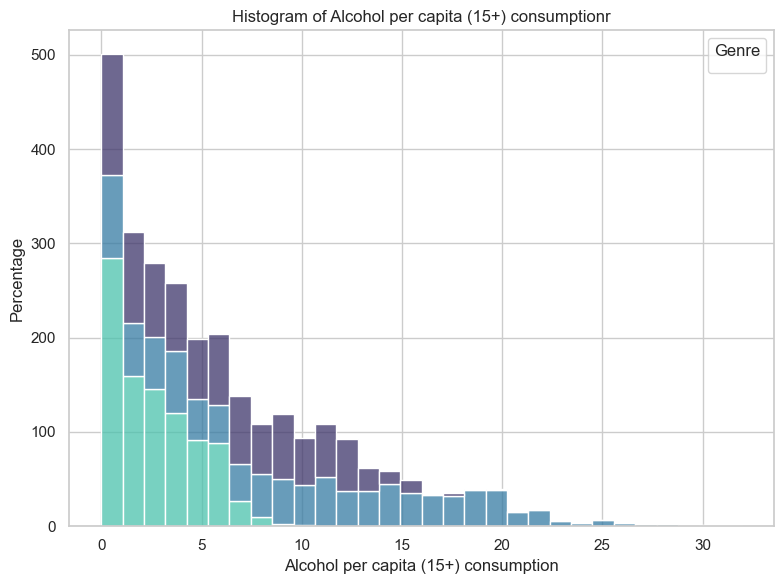

In [139]:

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  

sns.histplot(data=df_alcohol_copy, x='Alcohol per capita (15+) consumption', hue="Dim1", multiple="stack", palette="mako")

plt.xlabel("Alcohol per capita (15+) consumption")
plt.ylabel("Percentage")
plt.title("Histogram of Alcohol per capita (15+) consumptionr")

plt.legend(title="Genre")
plt.tight_layout()

plt.show()

#### **Análisis para Crude suicide rates (per 100 000 population)**

In [140]:
grouped_suicide_country = df_suicide_copy.groupby(["Location"])['Crude suicide rates per 100 000'].describe()

In [141]:
top_countries_suicide = grouped_suicide_country.sort_values(by='mean', ascending=False).head(10)
top_countries_suicide


,count,mean,std,min,25%,50%,75%,max
Location,,,,,,,,
Russian Federation,15.0,36.446667,32.400482,0.0,11.20,32.1,55.20,93.5
Lithuania,15.0,34.500000,29.186812,0.0,12.35,34.9,56.20,87.2
Belarus,15.0,31.533333,27.844124,0.0,10.30,26.3,46.05,80.0
Kazakhstan,15.0,26.633333,22.902142,0.0,9.40,24.9,40.95,68.4
Ukraine,15.0,25.186667,22.239215,0.0,7.60,23.1,39.45,65.1
Latvia,15.0,21.953333,18.924544,0.0,7.10,21.6,36.05,60.4
Hungary,15.0,21.493333,16.505214,0.0,10.75,20.3,32.05,51.5
Guyana,15.0,20.786667,14.390516,0.0,12.55,23.4,31.85,43.4
Republic of Korea,15.0,20.786667,14.495066,0.0,12.05,20.3,31.20,45.1


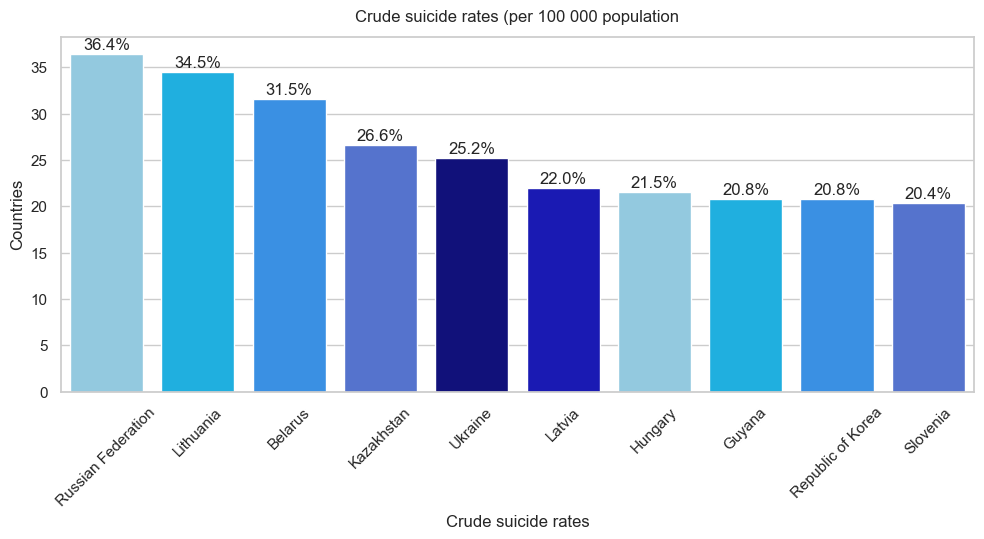

In [142]:

custom_colors = ['skyblue', 'deepskyblue', 'dodgerblue', 'royalblue', 'darkblue', 'mediumblue']
plot_bar_chart(top_countries_suicide, y_col='mean', title='Crude suicide rates (per 100 000 population', colors=custom_colors, x_label='Crude suicide rates', y_label= 'Countries')



In [144]:
top_5_countries_suicide = df_suicide_copy.groupby("Location")['Crude suicide rates per 100 000'].mean().nlargest(5).index
filtered_data_suicide = df_suicide_copy[df_suicide_copy["Location"].isin(top_5_countries_suicide)]
grouped_genre_suicide = filtered_data_suicide.groupby(["Location", "Dim1"])['Crude suicide rates per 100 000'].describe()
grouped_genre_suicide

count   mean        std  min   25%   50%   75%  \
Location           Dim1                                                         
Belarus            Both sexes    5.0  30.54  18.568064  0.0  26.3  38.2  43.1   
                   Female        5.0   9.72   5.922162  0.0   8.3  12.3  13.5   
                   Male          5.0  54.34  32.977235  0.0  47.0  68.1  76.6   
Kazakhstan         Both sexes    5.0  26.20  15.535926  0.0  24.9  32.7  34.0   
                   Female        5.0   8.48   4.959032  0.0   8.4  10.4  11.2   
                   Male          5.0  45.22  26.941177  0.0  42.5  55.7  59.5   
Lithuania          Both sexes    5.0  33.36  19.637668  0.0  34.9  37.3  43.9   
                   Female        5.0  11.62   7.001928  0.0  11.9  12.8  14.7   
                   Male          5.0  58.52  34.200687  0.0  61.7  66.1  77.6   
Russian Federation Both sexes    5.0  35.26  21.467371  0.0  32.1  40.0  51.6   
                   Female        5.0  10.98   6.702761  0.0   9.9  12.5  16.0   
                   Male          5.0  63.10  38.315075  0.0  57.8  71.7  92.5   
Ukraine            Both sexes    5.0  24.32  14.684754  0.0  23.1  27.1  34.5   
                   Female        5.0   7.64   4.762667  0.0   6.8   8.4  10.7   
                   Male          5.0  43.60  26.136277  0.0  42.0  48.9  62.0   

                                max  
Location           Dim1              
Belarus            Both sexes  45.1  
                   Female      14.5  
                   Male        80.0  
Kazakhstan         Both sexes  39.4  
                   Female      12.4  
                   Male        68.4  
Lithuania          Both sexes  50.7  
                   Female      18.7  
                   Male        87.2  
Russian Federation Both sexes  52.6  
                   Female      16.5  
                   Male        93.5  
Ukraine            Both sexes  36.9  
                   Female      12.3  
                   Male        65.1

<Figure size 1200x800 with 0 Axes>

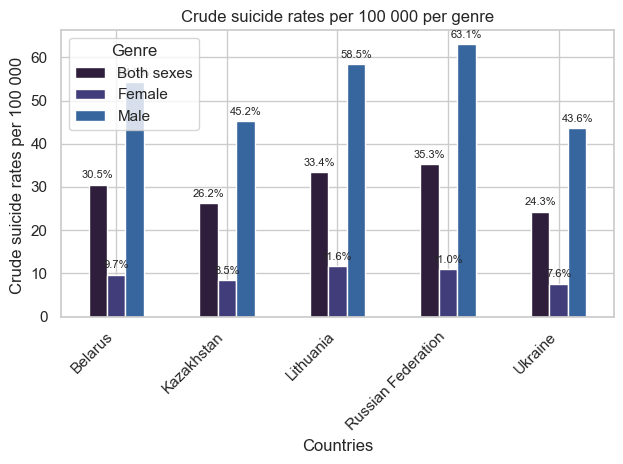

In [162]:

top_5_countries_suicide= df_suicide_copy.groupby("Location")['Crude suicide rates per 100 000'].mean().nlargest(5).index
filtered_data_suicide = df_suicide_copy[df_suicide_copy["Location"].isin(top_5_countries_suicide)]
plot_genre_by_country(filtered_data_suicide, x_label='Countries', y_label='Crude suicide rates per 100 000 ', title_t='Crude suicide rates per 100 000 per genre', target='Crude suicide rates per 100 000')



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


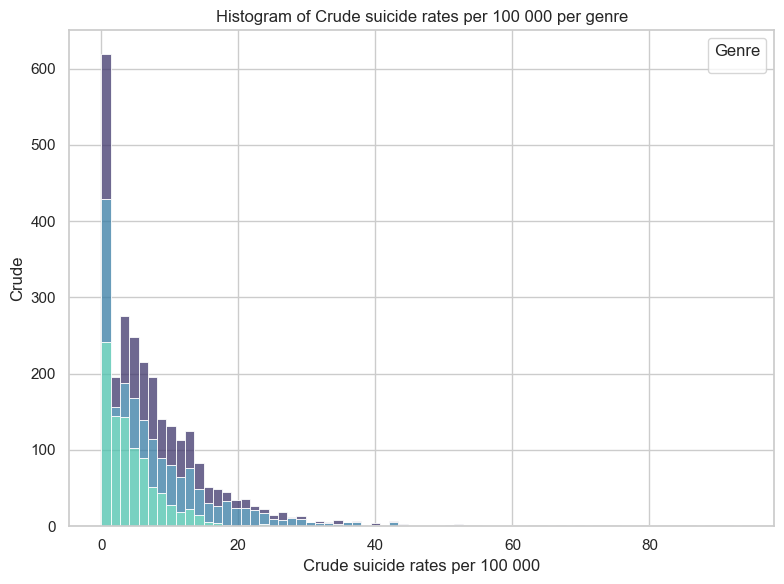

In [152]:

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  

sns.histplot(data=df_suicide_copy, x='Crude suicide rates per 100 000', hue="Dim1", multiple="stack", palette="mako")

plt.xlabel("Crude suicide rates per 100 000")
plt.ylabel("Crude")
plt.title("Histogram of Crude suicide rates per 100 000 per genre")

plt.legend(title="Genre")
plt.tight_layout()

plt.show()

# **Análisis del indicador: Age-standardized prevalence of current tobacco smoking among persons aged 15 years and older**

In [153]:
grouped_tobacco_country = df_tobacco_copy.groupby(["Location"])['Prevalence of current tobacco smoking (15+)'].describe()

In [154]:

top_countries_tobacco = grouped_tobacco_country.sort_values(by='mean', ascending=False).head(10)
top_countries_tobacco

,count,mean,std,min,25%,50%,75%,max
Location,,,,,,,,
Nauru,27.0,57.933333,6.283372,51.7,53.75,55.6,60.55,75.5
Kiribati,27.0,56.948148,14.043021,35.5,45.25,55.2,69.35,81.7
Tuvalu,27.0,52.996296,16.640925,31.4,35.50,51.4,67.35,84.6
Myanmar,27.0,50.907407,20.435940,20.8,32.35,48.8,70.95,83.0
Chile,27.0,47.381481,4.475492,40.3,44.40,46.8,50.30,57.1
Lao People's Democratic Republic,27.0,44.988889,20.675726,15.5,26.35,42.2,61.90,84.0
Timor-Leste,27.0,43.637037,26.416110,10.7,14.15,41.8,67.90,91.0
Lebanon,27.0,42.929630,5.390577,35.9,36.85,42.7,49.15,50.0
Bangladesh,27.0,42.725926,16.595240,17.7,27.65,41.1,60.70,65.3


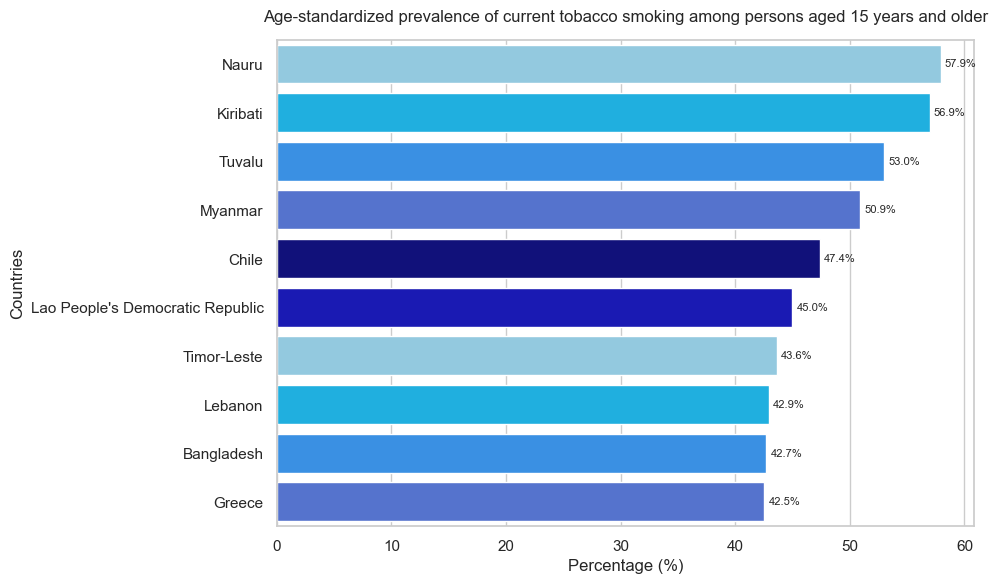

In [157]:

custom_colors = ['skyblue', 'deepskyblue', 'dodgerblue', 'royalblue', 'darkblue', 'mediumblue']
plot_bar_chart_horizontal(top_countries_tobacco, y_col='mean', title='Age-standardized prevalence of current tobacco smoking among persons aged 15 years and older', colors=custom_colors, x_label='Percentage (%)', y_label= 'Countries')


In [158]:
top_5_countries_tobbaco = df_tobacco_copy.groupby("Location")['Prevalence of current tobacco smoking (15+)'].mean().nlargest(5).index
filtered_data_tobbaco = df_tobacco_copy[df_tobacco_copy["Location"].isin(top_5_countries_tobbaco)]
grouped_genre_tobbaco = filtered_data_tobbaco.groupby(["Location", "Dim1"])['Prevalence of current tobacco smoking (15+)'].describe()
grouped_genre_tobbaco



count       mean       std   min   25%   50%   75%   max
Location Dim1                                                                
Chile    Both sexes    9.0  47.388889  2.924228  44.7  45.5  46.2  48.3  53.4
         Female        9.0  43.200000  3.153966  40.3  41.1  42.0  44.1  49.7
         Male          9.0  51.555556  2.706987  49.2  49.8  50.5  52.5  57.1
Kiribati Both sexes    9.0  56.955556  5.265242  52.0  53.5  55.2  58.1  67.9
         Female        9.0  41.222222  6.130208  35.5  37.4  39.2  42.5  54.1
         Male          9.0  72.666667  4.409649  68.6  69.6  71.2  73.7  81.7
Myanmar  Both sexes    9.0  50.900000  5.992495  45.5  46.8  48.8  52.5  63.3
         Female        9.0  27.400000  7.641662  20.8  22.4  24.4  29.0  43.7
         Male          9.0  74.422222  4.387134  70.2  71.2  73.1  76.1  83.0
Nauru    Both sexes    9.0  57.922222  6.287443  52.1  53.9  55.7  59.5  71.0
         Female        9.0  59.633333  7.642480  52.6  54.8  56.8  61.6  75.5
         Male          9.0  56.244444  4.890069  51.7  53.0  54.6  57.5  66.4
Tuvalu   Both sexes    9.0  52.988889  4.408924  48.7  50.0  51.4  54.4  61.8
         Female        9.0  33.744444  2.565205  31.4  32.1  32.8  34.4  39.1
         Male          9.0  72.255556  6.302799  66.0  67.8  70.1  74.4  84.6

<Figure size 1200x800 with 0 Axes>

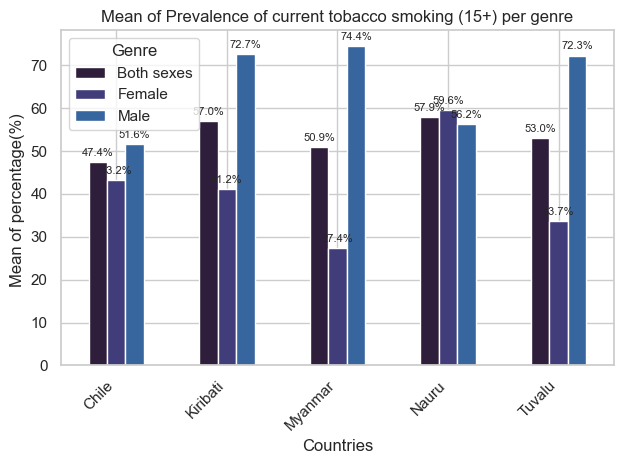

In [161]:

filtered_data_tobbaco = df_tobacco_copy[df_tobacco_copy["Location"].isin(top_5_countries_tobbaco)]
plot_genre_by_country(filtered_data_tobbaco, x_label='Countries', y_label='Mean of percentage(%) ', title_t='Mean of Prevalence of current tobacco smoking (15+) per genre', target='Prevalence of current tobacco smoking (15+)')



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


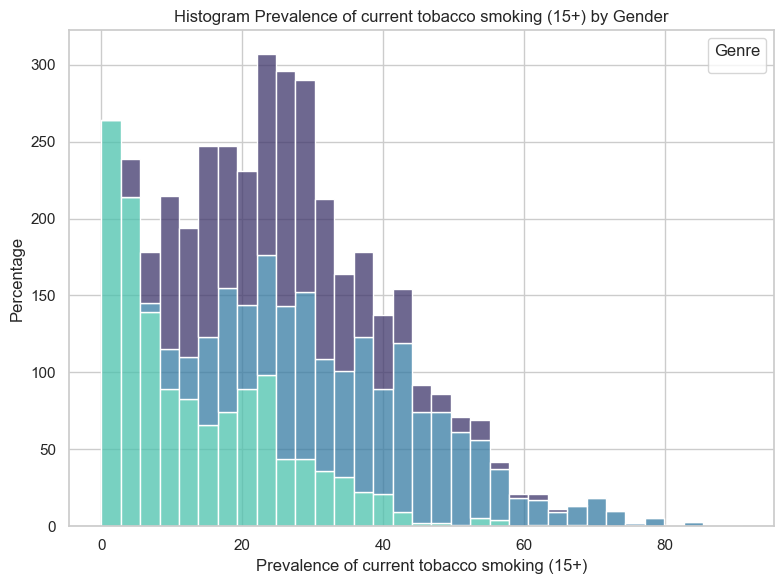

In [164]:

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  

sns.histplot(data=df_tobacco_copy, x='Prevalence of current tobacco smoking (15+)', hue="Dim1", multiple="stack", palette="mako")

plt.xlabel("Prevalence of current tobacco smoking (15+)")
plt.ylabel("Percentage")
plt.title("Histogram Prevalence of current tobacco smoking (15+) by Gender")

plt.legend(title="Genre")
plt.tight_layout()

plt.show()

#### **Aplicación de coeficiente de spearman no-parámetrico para el dataframe con todas las características**

In [203]:
df_structured.columns

Index(['Location', 'Period', 'Gender', 'Probability of dying 30-70',
       'Crude suicide rates per 100 000', 'Infant mortality rate',
       'Point estimate infant mortality rate',
       'Prevalence of current tobacco smoking (15+)',
       'Maternal mortality ratio per 100 000',
       'Point estimate maternal mortality ratio per 100 000',
       'Incidence of tuberculosis per 100 000',
       'Point estimate incidence of tuberculosis',
       'Road traffic death rate (per 100 000',
       'Alcohol per capita (15+) consumption', 'Cause',
       'Pollution death rate per 100 000 standarized',
       'Point estimate pollution death rate per 100 000 standarized',
       'Pollution death rate per 100 000',
       'Point estimate pollution death rate per 100 000'],
      dtype='object')

In [204]:
df_total = df_structured.copy()

In [205]:
numerical_var = [ 'Probability of dying 30-70',
       'Crude suicide rates per 100 000', 
       'Point estimate infant mortality rate',
       'Prevalence of current tobacco smoking (15+)',
       'Point estimate maternal mortality ratio per 100 000',
       'Point estimate incidence of tuberculosis',
       'Road traffic death rate (per 100 000',
       'Alcohol per capita (15+) consumption',
       'Point estimate pollution death rate per 100 000', 
       'Point estimate pollution death rate per 100 000 standarized']

In [206]:
df_correlation = df_total[numerical_var]

In [207]:
categorical_var = ['Location', 'Period', 'Gender']

In [208]:
df_categorical = df_total[categorical_var]

In [209]:
df_encoded = pd.get_dummies(df_categorical)


df_clean = pd.concat([df_correlation, df_encoded], axis=1)

In [211]:
correlation_matrix = df_clean.corr(method='spearman')

In [212]:
correlation_matrix

,Probability of dying 30-70,Crude suicide rates per 100 000,Point estimate infant mortality rate,Prevalence of current tobacco smoking (15+),Point estimate maternal mortality ratio per 100 000,Point estimate incidence of tuberculosis,Road traffic death rate (per 100 000,Alcohol per capita (15+) consumption,Point estimate pollution death rate per 100 000,Point estimate pollution death rate per 100 000 standarized,...,Location_Uzbekistan,Location_Vanuatu,Location_Venezuela (Bolivarian Republic of),Location_Viet Nam,Location_Yemen,Location_Zambia,Location_Zimbabwe,Gender_Both sexes,Gender_Female,Gender_Male
Probability of dying 30-70,1.000000,0.170395,0.593665,0.255942,0.496033,0.529295,0.371149,-0.019980,0.276300,0.452791,...,0.070342,0.058405,-0.011319,-0.021454,0.112502,-0.007707,0.008067,0.016344,-0.300392,0.284048
Crude suicide rates per 100 000,0.170395,1.000000,0.070808,0.208524,0.008776,0.044825,-0.082873,0.623276,-0.029117,-0.049554,...,0.010225,-0.009709,0.005800,-0.005797,-0.002465,-0.006085,0.004548,0.016519,-0.099432,0.082913
Point estimate infant mortality rate,0.593665,0.070808,1.000000,-0.203796,0.944916,0.771766,0.757701,-0.375462,0.218281,0.512462,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002579,-0.057589,0.055009
Prevalence of current tobacco smoking (15+),0.255942,0.208524,-0.203796,1.000000,-0.392540,-0.142624,-0.449922,0.387880,0.085887,-0.017499,...,-0.061365,0.009159,NaN,NaN,0.000810,-0.042545,-0.048728,0.042012,-0.538828,0.496816
Point estimate maternal mortality ratio per 100 000,0.496033,0.008776,0.944916,-0.392540,1.000000,0.762575,0.777103,-0.448558,0.203784,0.473810,...,-0.033949,0.020497,0.031979,-0.012950,0.052785,0.069216,0.096997,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Location_Zambia,-0.007707,-0.006085,NaN,-0.042545,0.069216,0.109224,NaN,0.005501,-0.004235,0.029981,...,-0.001582,-0.001582,-0.001489,-0.001489,-0.001582,1.000000,-0.001582,0.011203,-0.005632,-0.005635
Location_Zimbabwe,0.008067,0.004548,NaN,-0.048728,0.096997,0.096176,0.127955,-0.021081,0.002334,0.033760,...,-0.001582,-0.001582,-0.001489,-0.001489,-0.001582,-0.001582,1.000000,0.011203,-0.005632,-0.005635
Gender_Both sexes,0.016344,0.016519,0.002579,0.042012,NaN,NaN,NaN,0.071616,0.004383,0.003855,...,0.011203,0.011203,0.015315,0.015315,0.011203,0.011203,0.011203,1.000000,-0.502819,-0.502853
Gender_Female,-0.300392,-0.099432,-0.057589,-0.538828,NaN,NaN,NaN,-0.456144,-0.043450,-0.092796,...,-0.005632,-0.005632,-0.007700,-0.007700,-0.005632,-0.005632,-0.005632,-0.502819,1.000000,-0.494312


#### **Matriz de correlación solo para variables numéricas**

In [213]:
correlation_matrix_numerical = df_correlation.corr(method='spearman')


In [215]:
correlation_matrix_numerical

,Probability of dying 30-70,Crude suicide rates per 100 000,Point estimate infant mortality rate,Prevalence of current tobacco smoking (15+),Point estimate maternal mortality ratio per 100 000,Point estimate incidence of tuberculosis,Road traffic death rate (per 100 000,Alcohol per capita (15+) consumption,Point estimate pollution death rate per 100 000,Point estimate pollution death rate per 100 000 standarized
Probability of dying 30-70,1.000000,0.170395,0.593665,0.255942,0.496033,0.529295,0.371149,-0.019980,0.276300,0.452791
Crude suicide rates per 100 000,0.170395,1.000000,0.070808,0.208524,0.008776,0.044825,-0.082873,0.623276,-0.029117,-0.049554
Point estimate infant mortality rate,0.593665,0.070808,1.000000,-0.203796,0.944916,0.771766,0.757701,-0.375462,0.218281,0.512462
Prevalence of current tobacco smoking (15+),0.255942,0.208524,-0.203796,1.000000,-0.392540,-0.142624,-0.449922,0.387880,0.085887,-0.017499
Point estimate maternal mortality ratio per 100 000,0.496033,0.008776,0.944916,-0.392540,1.000000,0.762575,0.777103,-0.448558,0.203784,0.473810
Point estimate incidence of tuberculosis,0.529295,0.044825,0.771766,-0.142624,0.762575,1.000000,0.596510,-0.329184,0.248016,0.457522
Road traffic death rate (per 100 000,0.371149,-0.082873,0.757701,-0.449922,0.777103,0.596510,1.000000,NaN,0.132713,0.403243
Alcohol per capita (15+) consumption,-0.019980,0.623276,-0.375462,0.387880,-0.448558,-0.329184,NaN,1.000000,NaN,NaN
Point estimate pollution death rate per 100 000,0.276300,-0.029117,0.218281,0.085887,0.203784,0.248016,0.132713,NaN,1.000000,0.906461
Point estimate pollution death rate per 100 000 standarized,0.452791,-0.049554,0.512462,-0.017499,0.473810,0.457522,0.403243,NaN,0.906461,1.000000


# **Objetivo 3: Realización de hipótesis en relación al análisis exploratorio de los datos**

# **Objetivo 4: Realización del modelo**

In [270]:
df_work = df_structured.copy()


In [271]:
allowed_values = ['nan', 'Total']  

df_filtered_model = df_work[~df_work['Cause'].isin(allowed_values) & df_work['Cause'].notna()]

In [272]:
df_filtered_model['Cause'].value_counts()

Cause
Lower respiratory infections             549
Trachea, bronchus, lung cancers          549
Ischaemic heart disease                  549
Stroke                                   549
Chronic obstructive pulmonary disease    549
Name: count, dtype: int64

In [278]:
df_filtered_model

,Location,Period,Gender,Probability of dying 30-70,Crude suicide rates per 100 000,Infant mortality rate,Point estimate infant mortality rate,Prevalence of current tobacco smoking (15+),Maternal mortality ratio per 100 000,Point estimate maternal mortality ratio per 100 000,Incidence of tuberculosis per 100 000,Point estimate incidence of tuberculosis,Road traffic death rate (per 100 000,Alcohol per capita (15+) consumption,Cause,Pollution death rate per 100 000 standarized,Point estimate pollution death rate per 100 000 standarized,Pollution death rate per 100 000,Point estimate pollution death rate per 100 000,Target
1,Afghanistan,2016,Both sexes,29.8,0.0,44.36-58.38,51.32,NaN,457-1040,673.0,122-270,189.0,15.1,NaN,Lower respiratory infections,26.01-36.15,31.68,25.66-35.67,31.26,0
2,Afghanistan,2016,Both sexes,29.8,0.0,44.36-58.38,51.32,NaN,457-1040,673.0,122-270,189.0,15.1,NaN,"Trachea, bronchus, lung cancers",3.03-4.92,4.05,1.21-1.96,1.61,1
3,Afghanistan,2016,Both sexes,29.8,0.0,44.36-58.38,51.32,NaN,457-1040,673.0,122-270,189.0,15.1,NaN,Ischaemic heart disease,91.91-121.1,106.90,33.12-43.65,38.51,0
4,Afghanistan,2016,Both sexes,29.8,0.0,44.36-58.38,51.32,NaN,457-1040,673.0,122-270,189.0,15.1,NaN,Stroke,38.59-51.65,45.10,13.48-18.04,15.75,0
5,Afghanistan,2016,Both sexes,29.8,0.0,44.36-58.38,51.32,NaN,457-1040,673.0,122-270,189.0,15.1,NaN,Chronic obstructive pulmonary disease,17.85-28.08,23.35,5.33-8.39,6.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5473,Zimbabwe,2016,Female,19.8,0.0,NaN,NaN,1.4,NaN,NaN,NaN,NaN,NaN,NaN,Lower respiratory infections,46.72-64.99,56.47,31.85-44.31,38.50,0
5474,Zimbabwe,2016,Female,19.8,0.0,NaN,NaN,1.4,NaN,NaN,NaN,NaN,NaN,NaN,"Trachea, bronchus, lung cancers",0.78-1.2,1.01,0.36-0.56,0.47,1
5475,Zimbabwe,2016,Female,19.8,0.0,NaN,NaN,1.4,NaN,NaN,NaN,NaN,NaN,NaN,Ischaemic heart disease,32.02-43.72,37.88,13.47-18.39,15.94,0
5476,Zimbabwe,2016,Female,19.8,0.0,NaN,NaN,1.4,NaN,NaN,NaN,NaN,NaN,NaN,Stroke,19.22-26.5,22.68,8.7-12,10.27,0


#### **Se crea la columna target que asigna un valor de 1 a los canceres de pulmón**

In [273]:
def assign_value(cause):
    if cause == 'Trachea, bronchus, lung cancers':
        return 1
    else:
        return 0


df_filtered_model.loc[:, 'Target'] = df_filtered_model['Cause'].apply(lambda x: assign_value(x))

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_9892\2733392939.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered_model.loc[:, 'Target'] = df_filtered_model['Cause'].apply(lambda x: assign_value(x))


#### **Observar las relaciones agrupado por país**

In [263]:
grouped_data_model

In [281]:
numerical_var_model = [ 'Probability of dying 30-70',
       'Point estimate infant mortality rate',
       'Prevalence of current tobacco smoking (15+)',
       'Point estimate maternal mortality ratio per 100 000',
       'Alcohol per capita (15+) consumption',
       'Point estimate incidence of tuberculosis',
       'Target',
       'Location', 'Gender', 'Period'
       ]

In [282]:
df_correlation_model = df_filtered_model[numerical_var_model]

In [283]:
df_correlation_model.to_excel('Datos_modelo.xlsx')

Por factores de riesgo leídos en un articulo se tiene que las variables a conservar para el modelo serán: 

Factores de riesgo asociados a cancer:

Probability (%) of dying between age 30 and exact age 70 from any of cardiovascular disease, cancer, diabetes, or chronic respiratory disease

Age-standardized prevalence of current tobacco smoking among persons aged 15 years and older

Alcohol per capita (15+) consumption

Point estimate infant mortality rate

Point estimate infant mortality rate

Point estimate incidence of tuberculosis

Además se incluirán las variables:

Location

Genre

Period